In [1]:
import matplotlib.pyplot as plt

import torch
import torchvision

import torch.optim as optim
from tqdm.auto import tqdm

from chest_xray_dcgan.data_setup import load_data

import numpy as np

from chest_xray_dcgan import engine, utils
from chest_xray_dcgan.model import Generator, Discriminator



/Users/isaacchan/chest-xray-gan/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
normal_train_dir = "./data/train/train_normal"
normal_test_dir = "./data/test/test_normal"

gen_path = "./models/generator/g2.pth"
dis_path = "./models/discriminator/d2.pth"

batch_size = 256
num_workers = 2

normal_train_dataloader = load_data(normal_train_dir, batch_size, num_workers)
normal_test_dataloader = load_data(normal_test_dir, batch_size, num_workers)

In [3]:
gen = Generator()
dis = Discriminator()

utils.load_models(gen, dis, gen_path, dis_path)

(Generator(
   (main): Sequential(
     (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(2, 2), bias=False)
     (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU(inplace=True)
     (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (5): ReLU(inplace=True)
     (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (8): ReLU(inplace=True)
     (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (11): ReLU(inplace=True)
     (12): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (13

In [4]:
gen.to("mps")
dis.to("mps")

Discriminator(
  (main): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [5]:
loss_fn = torch.nn.BCELoss()

In [60]:
num_epochs = 20
beta1 = 0.5

gen_optimizer = optim.Adam(gen.parameters(), lr=0.00003, betas=(beta1, 0.999))
dis_optimizer = optim.Adam(dis.parameters(), lr=0.00003, betas=(beta1, 0.999))

In [61]:

for epoch in tqdm(range(num_epochs)):
    df, dr, gl = engine.train(gen, dis, normal_train_dataloader, loss_fn, dis_optimizer, gen_optimizer, "mps")
    print("df: " + str(df.cpu().item()))
    print("dr: " + str(dr.cpu().item()))
    print("gl: " + str(gl.cpu().item()))

  0%|          | 0/20 [00:00<?, ?it/s]

fake loss: 0.23250171542167664 | real loss: 0.02534578926861286 | gen loss: 4.527448654174805
fake loss: 0.03428294137120247 | real loss: 0.19420281052589417 | gen loss: 3.8076469898223877
fake loss: 0.0511261448264122 | real loss: 0.11950348317623138 | gen loss: 3.0847458839416504
fake loss: 0.1199733093380928 | real loss: 0.04194473475217819 | gen loss: 3.261064291000366
fake loss: 0.1064135804772377 | real loss: 0.05884145200252533 | gen loss: 3.771056652069092
fake loss: 0.0692131295800209 | real loss: 0.1171187087893486 | gen loss: 3.49581241607666


  5%|▌         | 1/20 [00:22<06:58, 22.03s/it]

df: 0.1022518053650856
dr: 0.09282616525888443
gl: 3.6579627990722656
fake loss: 0.0720026046037674 | real loss: 0.0835585966706276 | gen loss: 3.411426305770874
fake loss: 0.09057818353176117 | real loss: 0.06125706434249878 | gen loss: 3.5763542652130127
fake loss: 0.06030398607254028 | real loss: 0.06315870583057404 | gen loss: 3.9076600074768066
fake loss: 0.061691951006650925 | real loss: 0.08094653487205505 | gen loss: 3.6311721801757812
fake loss: 0.06889715790748596 | real loss: 0.059815190732479095 | gen loss: 3.6736464500427246
fake loss: 0.058434341102838516 | real loss: 0.06765247881412506 | gen loss: 3.942070484161377


 10%|█         | 2/20 [00:43<06:34, 21.89s/it]

df: 0.06865137070417404
dr: 0.06939809769392014
gl: 3.6903884410858154
fake loss: 0.07595868408679962 | real loss: 0.06144699454307556 | gen loss: 3.7331204414367676
fake loss: 0.05849505215883255 | real loss: 0.07051397860050201 | gen loss: 3.8185739517211914
fake loss: 0.06538446247577667 | real loss: 0.060669079422950745 | gen loss: 3.7561893463134766
fake loss: 0.05671747773885727 | real loss: 0.07607872039079666 | gen loss: 3.611185073852539
fake loss: 0.07383871078491211 | real loss: 0.058241065591573715 | gen loss: 3.7680068016052246
fake loss: 0.05235765874385834 | real loss: 0.05482563003897667 | gen loss: 3.8899919986724854


 15%|█▌        | 3/20 [01:05<06:11, 21.87s/it]

df: 0.06379201263189316
dr: 0.06362924724817276
gl: 3.7628448009490967
fake loss: 0.06411024928092957 | real loss: 0.0555826760828495 | gen loss: 3.940901279449463
fake loss: 0.04703414440155029 | real loss: 0.06612329185009003 | gen loss: 3.875610828399658
fake loss: 0.05348983034491539 | real loss: 0.051586877554655075 | gen loss: 3.849012613296509
fake loss: 0.0504186786711216 | real loss: 0.056521378457546234 | gen loss: 3.846041679382324
fake loss: 0.05586760863661766 | real loss: 0.05044524371623993 | gen loss: 3.9657530784606934
fake loss: 0.0597405806183815 | real loss: 0.04417084902524948 | gen loss: 4.186936855316162


 20%|██        | 4/20 [01:27<05:51, 21.97s/it]

df: 0.055110182613134384
dr: 0.05407172441482544
gl: 3.944042921066284
fake loss: 0.04692744463682175 | real loss: 0.07671068608760834 | gen loss: 3.7123494148254395
fake loss: 0.05727385729551315 | real loss: 0.04984695464372635 | gen loss: 3.8522305488586426
fake loss: 0.050861749798059464 | real loss: 0.04921075701713562 | gen loss: 4.108830451965332
fake loss: 0.05138543248176575 | real loss: 0.04602127522230148 | gen loss: 4.145228862762451
fake loss: 0.044023435562849045 | real loss: 0.06309638172388077 | gen loss: 3.887319564819336
fake loss: 0.05770726129412651 | real loss: 0.04549069702625275 | gen loss: 4.087315559387207


 25%|██▌       | 5/20 [01:49<05:29, 21.99s/it]

df: 0.05136319622397423
dr: 0.05506278946995735
gl: 3.965545654296875
fake loss: 0.05243709683418274 | real loss: 0.05149412900209427 | gen loss: 4.083189964294434
fake loss: 0.04798462986946106 | real loss: 0.06086267903447151 | gen loss: 3.956908702850342
fake loss: 0.05788770318031311 | real loss: 0.04714429751038551 | gen loss: 4.146780967712402
fake loss: 0.041349805891513824 | real loss: 0.06961303949356079 | gen loss: 3.8443424701690674
fake loss: 0.04884251952171326 | real loss: 0.05239040404558182 | gen loss: 3.8328213691711426
fake loss: 0.06768891215324402 | real loss: 0.034321725368499756 | gen loss: 4.55869722366333


 30%|███       | 6/20 [02:12<05:09, 22.12s/it]

df: 0.052698444575071335
dr: 0.05263771116733551
gl: 4.070456504821777
fake loss: 0.03271053731441498 | real loss: 0.07255092263221741 | gen loss: 3.9045283794403076
fake loss: 0.050116874277591705 | real loss: 0.04181721806526184 | gen loss: 4.06658411026001
fake loss: 0.05284569412469864 | real loss: 0.04325050488114357 | gen loss: 4.33699893951416
fake loss: 0.03588494658470154 | real loss: 0.05968967825174332 | gen loss: 3.9443960189819336
fake loss: 0.061131030321121216 | real loss: 0.04096211493015289 | gen loss: 4.2987446784973145
fake loss: 0.04023269563913345 | real loss: 0.0887012630701065 | gen loss: 3.5204031467437744


 35%|███▌      | 7/20 [02:34<04:47, 22.15s/it]

df: 0.04548696056008339
dr: 0.057828616350889206
gl: 4.011942386627197
fake loss: 0.07923096418380737 | real loss: 0.02463674172759056 | gen loss: 4.731163024902344
fake loss: 0.02030182257294655 | real loss: 0.05807478725910187 | gen loss: 4.4401044845581055
fake loss: 0.043032485991716385 | real loss: 0.04976124316453934 | gen loss: 3.8533759117126465
fake loss: 0.06898391991853714 | real loss: 0.036465998739004135 | gen loss: 4.500155448913574
fake loss: 0.028802743181586266 | real loss: 0.059951525181531906 | gen loss: 4.151779651641846
fake loss: 0.05424121767282486 | real loss: 0.04977205768227577 | gen loss: 4.27186918258667


 40%|████      | 8/20 [02:56<04:26, 22.20s/it]

df: 0.04909886047244072
dr: 0.04644373059272766
gl: 4.324741363525391
fake loss: 0.03615007922053337 | real loss: 0.04209122061729431 | gen loss: 4.335977554321289
fake loss: 0.0384347066283226 | real loss: 0.036328673362731934 | gen loss: 4.350116729736328
fake loss: 0.04187915474176407 | real loss: 0.04237638786435127 | gen loss: 4.288926124572754
fake loss: 0.03218967095017433 | real loss: 0.05914738029241562 | gen loss: 3.8061318397521973
fake loss: 0.05737076327204704 | real loss: 0.03044946864247322 | gen loss: 4.583164691925049
fake loss: 0.029384415596723557 | real loss: 0.10274513810873032 | gen loss: 3.0676748752593994


 45%|████▌     | 9/20 [03:19<04:05, 22.32s/it]

df: 0.03923479840159416
dr: 0.05218970775604248
gl: 4.071998596191406
fake loss: 0.14317640662193298 | real loss: 0.01365666463971138 | gen loss: 5.915036201477051
fake loss: 0.00849808007478714 | real loss: 0.13584592938423157 | gen loss: 4.318991661071777
fake loss: 0.03604988008737564 | real loss: 0.022044261917471886 | gen loss: 3.895494222640991
fake loss: 0.06347908079624176 | real loss: 0.01980872079730034 | gen loss: 4.790231227874756
fake loss: 0.02465144544839859 | real loss: 0.049748897552490234 | gen loss: 4.701083660125732
fake loss: 0.03110310062766075 | real loss: 0.033212337642908096 | gen loss: 4.462329864501953


 50%|█████     | 10/20 [03:42<03:44, 22.48s/it]

df: 0.05115966126322746
dr: 0.04571947082877159
gl: 4.680528163909912
fake loss: 0.032501351088285446 | real loss: 0.05415637791156769 | gen loss: 3.89156436920166
fake loss: 0.05565200746059418 | real loss: 0.02352994494140148 | gen loss: 4.576358795166016
fake loss: 0.025470741093158722 | real loss: 0.048277612775564194 | gen loss: 4.382539749145508
fake loss: 0.04128073528409004 | real loss: 0.037718333303928375 | gen loss: 4.250741958618164
fake loss: 0.038304589688777924 | real loss: 0.04660345986485481 | gen loss: 4.124074935913086
fake loss: 0.04702926427125931 | real loss: 0.064479298889637 | gen loss: 3.7866404056549072


 55%|█████▌    | 11/20 [04:04<03:22, 22.50s/it]

df: 0.0400397814810276
dr: 0.04579417407512665
gl: 4.1686530113220215
fake loss: 0.05963292717933655 | real loss: 0.03347143903374672 | gen loss: 4.5052666664123535
fake loss: 0.03519611805677414 | real loss: 0.06815207004547119 | gen loss: 3.9942145347595215
fake loss: 0.059889085590839386 | real loss: 0.043529003858566284 | gen loss: 4.234683513641357
fake loss: 0.03112412802875042 | real loss: 0.06918162107467651 | gen loss: 3.667018413543701
fake loss: 0.08208319544792175 | real loss: 0.03154996037483215 | gen loss: 4.754099369049072
fake loss: 0.029299847781658173 | real loss: 0.05925843119621277 | gen loss: 4.434003829956055


 60%|██████    | 12/20 [04:27<02:59, 22.48s/it]

df: 0.049537550657987595
dr: 0.05085708573460579
gl: 4.264881134033203
fake loss: 0.038185760378837585 | real loss: 0.05558370426297188 | gen loss: 3.7237730026245117
fake loss: 0.060434937477111816 | real loss: 0.03053397685289383 | gen loss: 4.540584564208984
fake loss: 0.029804470017552376 | real loss: 0.07563969492912292 | gen loss: 3.8607895374298096
fake loss: 0.0637814849615097 | real loss: 0.043279655277729034 | gen loss: 4.27217960357666
fake loss: 0.04993916302919388 | real loss: 0.05934029072523117 | gen loss: 4.185621738433838
fake loss: 0.05614025518298149 | real loss: 0.06681249290704727 | gen loss: 4.0014214515686035


 65%|██████▌   | 13/20 [04:49<02:37, 22.45s/it]

df: 0.0497143417596817
dr: 0.0551983006298542
gl: 4.097394943237305
fake loss: 0.0516209751367569 | real loss: 0.04863356798887253 | gen loss: 4.295901298522949
fake loss: 0.04032844305038452 | real loss: 0.04597114399075508 | gen loss: 4.353878498077393
fake loss: 0.04421209543943405 | real loss: 0.04542183130979538 | gen loss: 4.378664016723633
fake loss: 0.04057186096906662 | real loss: 0.052683841437101364 | gen loss: 4.1470842361450195
fake loss: 0.05253484100103378 | real loss: 0.04638534411787987 | gen loss: 4.358582973480225
fake loss: 0.056613508611917496 | real loss: 0.07685015350580215 | gen loss: 3.861873149871826


 70%|███████   | 14/20 [05:11<02:14, 22.47s/it]

df: 0.04764695465564728
dr: 0.05265764892101288
gl: 4.232664585113525
fake loss: 0.07332190126180649 | real loss: 0.0291746836155653 | gen loss: 5.079570770263672
fake loss: 0.022041380405426025 | real loss: 0.08108510076999664 | gen loss: 4.019130706787109
fake loss: 0.06813646852970123 | real loss: 0.0277127455919981 | gen loss: 5.008073806762695
fake loss: 0.023130878806114197 | real loss: 0.05547306314110756 | gen loss: 4.34501838684082
fake loss: 0.0369725339114666 | real loss: 0.028884219005703926 | gen loss: 4.386874198913574
fake loss: 0.04907238483428955 | real loss: 0.02464245818555355 | gen loss: 5.127451419830322


 75%|███████▌  | 15/20 [05:34<01:52, 22.48s/it]

df: 0.04544592276215553
dr: 0.04116204380989075
gl: 4.661019802093506
fake loss: 0.026827817782759666 | real loss: 0.07287817448377609 | gen loss: 3.868135452270508
fake loss: 0.07530970126390457 | real loss: 0.028001848608255386 | gen loss: 4.922950744628906
fake loss: 0.027218125760555267 | real loss: 0.06859413534402847 | gen loss: 4.117648124694824
fake loss: 0.05538276582956314 | real loss: 0.035574764013290405 | gen loss: 4.369266033172607
fake loss: 0.04592682793736458 | real loss: 0.04373609274625778 | gen loss: 4.555376052856445
fake loss: 0.04673709347844124 | real loss: 0.07564876973628998 | gen loss: 3.866999626159668


 80%|████████  | 16/20 [05:57<01:30, 22.72s/it]

df: 0.04623371735215187
dr: 0.0540723018348217
gl: 4.283395767211914
fake loss: 0.08262456953525543 | real loss: 0.02490868791937828 | gen loss: 5.207181930541992
fake loss: 0.015098393894731998 | real loss: 0.07335507869720459 | gen loss: 4.40338134765625
fake loss: 0.03904908522963524 | real loss: 0.03652706369757652 | gen loss: 4.034453392028809
fake loss: 0.06644266098737717 | real loss: 0.02934165671467781 | gen loss: 4.869182586669922
fake loss: 0.024806074798107147 | real loss: 0.06896398961544037 | gen loss: 4.1169819831848145
fake loss: 0.061441536992788315 | real loss: 0.02683756873011589 | gen loss: 4.700026035308838


 85%|████████▌ | 17/20 [06:20<01:07, 22.66s/it]

df: 0.04824372008442879
dr: 0.04332233965396881
gl: 4.555201053619385
fake loss: 0.03420284017920494 | real loss: 0.05388561636209488 | gen loss: 4.4020094871521
fake loss: 0.04594608396291733 | real loss: 0.02954060211777687 | gen loss: 4.679569244384766
fake loss: 0.03386056423187256 | real loss: 0.05206525698304176 | gen loss: 4.193816184997559
fake loss: 0.04188082739710808 | real loss: 0.029321802780032158 | gen loss: 4.647737503051758
fake loss: 0.03353600949048996 | real loss: 0.041309207677841187 | gen loss: 4.411653995513916
fake loss: 0.03676173835992813 | real loss: 0.05866139382123947 | gen loss: 3.7695350646972656


 90%|█████████ | 18/20 [06:43<00:45, 22.68s/it]

df: 0.037698011845350266
dr: 0.04413064941763878
gl: 4.350720405578613
fake loss: 0.08349111676216125 | real loss: 0.01830137148499489 | gen loss: 5.664070129394531
fake loss: 0.015839967876672745 | real loss: 0.08323295414447784 | gen loss: 4.358479976654053
fake loss: 0.03988534212112427 | real loss: 0.03011460229754448 | gen loss: 4.173339366912842
fake loss: 0.057175181806087494 | real loss: 0.023118505254387856 | gen loss: 5.209437370300293
fake loss: 0.02109616994857788 | real loss: 0.07328979671001434 | gen loss: 4.057843208312988
fake loss: 0.06136908009648323 | real loss: 0.03320584446191788 | gen loss: 4.54779577255249


 95%|█████████▌| 19/20 [07:05<00:22, 22.73s/it]

df: 0.04647614434361458
dr: 0.043543845415115356
gl: 4.66849422454834
fake loss: 0.03355709835886955 | real loss: 0.027605965733528137 | gen loss: 5.033968925476074
fake loss: 0.027488889172673225 | real loss: 0.056271351873874664 | gen loss: 4.179024696350098
fake loss: 0.050023142248392105 | real loss: 0.02727775275707245 | gen loss: 4.707729339599609
fake loss: 0.034638162702322006 | real loss: 0.04067292809486389 | gen loss: 4.685560703277588
fake loss: 0.036279819905757904 | real loss: 0.06346499919891357 | gen loss: 3.8586411476135254
fake loss: 0.08583946526050568 | real loss: 0.013513711281120777 | gen loss: 6.197983741760254


100%|██████████| 20/20 [07:28<00:00, 22.42s/it]

df: 0.044637758284807205
dr: 0.03813445195555687
gl: 4.777151107788086


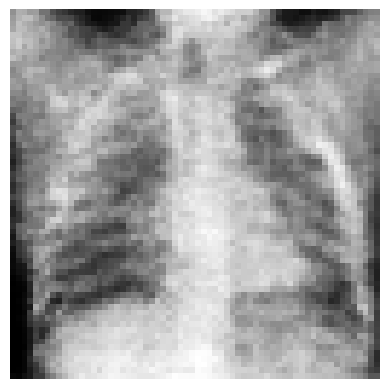

In [80]:
plt.axis('off')
z = torch.randn(1, 128, 1, 1, device="mps")
plt.imshow(gen(z).cpu().detach().numpy()[0, 0, :, :], "gray")

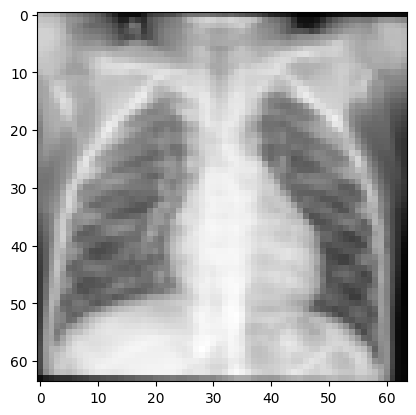

In [9]:
image = next(iter(normal_train_dataloader))
plt.imshow(image[0].cpu().numpy()[0, 0, :, :], "gray")

In [81]:
# Uncomment and run cell to save model
#utils.save_models(gen, dis, gen_path, dis_path)